In [39]:
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import time
import seaborn as sns

In [60]:
df = pd.read_csv('leg234_data.csv')
df

,LATITUDE,LONGITUD,PDMEAN,TOTAL,dataid,NMEA.Wind_Speed,NMEA.Wind_Angle,NMEA.Wave_Height,PCO2.H2O_mmm,PCO2.CO2_umm,...,FerryBox.SBE45_Conductivity,FerryBox.Optode_Saturation,FerryBox.C3_Turbidity,FerryBox.C3_CHLAFluorescence,FerryBox.C3_Temperature,FerryBox.C3_CDOMFluorescence,date,day,month,time
0,27.15121,-16.94351,7.5,0.0000,1633431600000000000,10.932143,167.483337,1.88,0.44,417.429993,...,5.4545,95.870003,0.545,-0.50,24.469999,-0.15,2021-10-05,5,10,11.0
1,27.15121,-16.94351,15.0,6.6924,1633431600000000000,10.932143,167.483337,1.88,0.44,417.429993,...,5.4545,95.870003,0.545,-0.50,24.469999,-0.15,2021-10-05,5,10,11.0
2,27.15121,-16.94351,25.0,27.0674,1633431600000000000,10.932143,167.483337,1.88,0.44,417.429993,...,5.4545,95.870003,0.545,-0.50,24.469999,-0.15,2021-10-05,5,10,11.0
3,27.15121,-16.94351,35.0,21.1011,1633431600000000000,10.932143,167.483337,1.88,0.44,417.429993,...,5.4545,95.870003,0.545,-0.50,24.469999,-0.15,2021-10-05,5,10,11.0
4,27.15121,-16.94351,45.0,22.7452,1633431600000000000,10.932143,167.483337,1.88,0.44,417.429993,...,5.4545,95.870003,0.545,-0.50,24.469999,-0.15,2021-10-05,5,10,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219694,23.19454,-40.66192,685.0,35.0402,1645304400000000000,3.760000,79.833336,1.88,0.44,417.429993,...,5.7960,94.059998,-0.380,-0.45,28.410000,-0.15,2022-02-19,19,2,21.0
219695,23.19454,-40.66192,695.0,45.1827,1645304400000000000,3.760000,79.833336,1.88,0.44,417.429993,...,5.7960,94.059998,-0.380,-0.45,28.410000,-0.15,2022-02-19,19,2,21.0
219696,23.19454,-40.66192,705.0,351.3631,1645304400000000000,3.760000,79.833336,1.88,0.44,417.429993,...,5.7960,94.059998,-0.380,-0.45,28.410000,-0.15,2022-02-19,19,2,21.0
219697,23.19454,-40.66192,715.0,42.6268,1645304400000000000,3.760000,79.833336,1.88,0.44,417.429993,...,5.7960,94.059998,-0.380,-0.45,28.410000,-0.15,2022-02-19,19,2,21.0


In [62]:
df = df.astype(float)
print(df.dtypes)
names = df.columns
# Create the Scaler object
scaler = preprocessing.StandardScaler()
# Fit your data on the scaler object
scaled_df = scaler.fit_transform(df)
df = pd.DataFrame(scaled_df, columns=names)

LATITUDE                        float64
LONGITUD                        float64
PDMEAN                          float64
TOTAL                           float64
PCO2.H2O_mmm                    float64
PCO2.CO2_umm                    float64
PCO2.atm_cond                   float64
NMEA.Humidity                   float64
NMEA.Trykk                      float64
FerryBox.SBE45_Salinity         float64
FerryBox.SBE45_Conductivity     float64
FerryBox.Optode_Saturation      float64
FerryBox.C3_Turbidity           float64
FerryBox.C3_CHLAFluorescence    float64
FerryBox.C3_Temperature         float64
FerryBox.C3_CDOMFluorescence    float64
day                             float64
month                           float64
time                            float64
dtype: object


In [336]:
df = df.astype(float)
print(df.dtypes)
names = df.columns
# Create the Scaler object
scaler = preprocessing.Normalizer()
# Fit your data on the scaler object
scaled_df = scaler.fit_transform(df.T).T
df = pd.DataFrame(scaled_df, columns=names)

LATITUDE                        float64
LONGITUD                        float64
PDMEAN                          float64
TOTAL                           float64
dataid                          float64
NMEA.Wind_Speed                 float64
NMEA.Wind_Angle                 float64
NMEA.Wave_Height                float64
PCO2.H2O_mmm                    float64
PCO2.CO2_umm                    float64
PCO2.atm_cond                   float64
NMEA.Humidity                   float64
NMEA.Trykk                      float64
FerryBox.SBE45_Salinity         float64
FerryBox.SBE45_Conductivity     float64
FerryBox.Optode_Saturation      float64
FerryBox.C3_Turbidity           float64
FerryBox.C3_CHLAFluorescence    float64
FerryBox.C3_Temperature         float64
FerryBox.C3_CDOMFluorescence    float64
date                            float64
time                            float64
dtype: object


In [61]:
df = df.drop(columns=['NMEA.Wave_Height', 'NMEA.Wind_Speed', 'NMEA.Wind_Angle', 'dataid', 'date'])

In [63]:
y = df.iloc[:, df.columns == 'TOTAL']
X = df.iloc[:, df.columns != 'TOTAL']


In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, 
    test_size=0.25, random_state=42) 

In [65]:
X_train

,LATITUDE,LONGITUD,PDMEAN,PCO2.H2O_mmm,PCO2.CO2_umm,PCO2.atm_cond,NMEA.Humidity,NMEA.Trykk,FerryBox.SBE45_Salinity,FerryBox.SBE45_Conductivity,FerryBox.Optode_Saturation,FerryBox.C3_Turbidity,FerryBox.C3_CHLAFluorescence,FerryBox.C3_Temperature,FerryBox.C3_CDOMFluorescence,day,month,time
98043,-0.736445,0.186446,-1.631332,-0.062072,-0.038080,0.206904,-0.157948,-0.697525,-1.211638,-1.281696,-0.557670,-0.134113,-0.177640,0.201154,0.053271,0.287945,0.340496,1.331712
209055,-0.747601,0.361452,-1.005203,-0.062072,-0.038080,0.206904,-0.174632,-0.844602,0.608893,1.557926,0.219720,-0.158687,0.085622,0.539681,0.601618,-0.036248,-2.083595,1.258145
150388,0.587815,-2.217140,0.969513,-1.508698,0.721427,-1.699786,-0.179124,0.046432,-1.211638,-1.281696,-0.557670,-0.134113,-0.177640,0.201154,0.053271,1.422620,0.643507,-0.433903
92486,-0.754269,0.255961,0.536038,-0.062072,-0.038080,0.206904,-0.221796,-0.743569,0.400377,1.001041,0.563092,-0.145941,-0.309270,0.224105,0.053271,0.287945,0.340496,-0.286768
45185,-0.004984,0.768802,-0.764384,0.262405,1.727461,0.206904,-0.179124,0.046432,-1.211638,-1.281696,-0.557670,-0.134113,-0.177640,0.201154,0.053271,-0.522537,0.340496,-0.139633
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21227,0.755664,0.978023,0.728694,-0.062072,-0.038080,0.206904,1.336865,0.046835,1.363337,0.062861,0.601550,-0.148286,-0.309270,-0.747486,-1.043422,-1.008827,0.340496,1.258145
206656,-3.494495,0.416239,-0.523565,-0.062072,-0.038080,0.206904,0.054451,-1.095166,0.297255,1.487688,0.145552,-0.158993,0.085622,0.602796,-0.220902,-0.198344,-2.083595,1.258145
170470,2.159778,-1.761392,0.198892,-0.062072,-0.038080,0.206904,-0.980913,3.121257,0.383693,-0.032462,-2.409125,-0.131666,-0.309270,-0.502676,0.053271,0.125849,0.946518,0.007501
134757,-0.738350,-0.254657,-0.957039,-0.062072,-0.038080,0.206904,0.146533,-0.624191,-0.929572,0.589646,0.277406,-0.144513,-0.440901,0.388587,-0.220902,0.936331,0.340496,0.081068


Feature: LATITUDE, Score: 0.12022
Feature: LONGITUD, Score: 0.13375
Feature: PDMEAN, Score: 0.31490
Feature: dataid, Score: 0.03458
Feature: NMEA.Wind_Speed, Score: 0.05454
Feature: NMEA.Wind_Angle, Score: 0.07269
Feature: PCO2.H2O_mmm, Score: 0.00264
Feature: PCO2.CO2_umm, Score: 0.01684
Feature: PCO2.atm_cond, Score: 0.00025
Feature: NMEA.Humidity, Score: 0.02262
Feature: NMEA.Trykk, Score: 0.02361
Feature: FerryBox.SBE45_Salinity, Score: 0.01790
Feature: FerryBox.SBE45_Conductivity, Score: 0.01329
Feature: FerryBox.Optode_Saturation, Score: 0.03018
Feature: FerryBox.C3_Turbidity, Score: 0.04004
Feature: FerryBox.C3_CHLAFluorescence, Score: 0.00847
Feature: FerryBox.C3_Temperature, Score: 0.01819
Feature: FerryBox.C3_CDOMFluorescence, Score: 0.01182
Feature: date, Score: 0.00639
Feature: time, Score: 0.05710


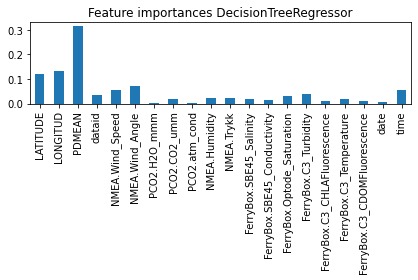

In [11]:
# define the model
model = DecisionTreeRegressor()
# fit the model
model.fit(X_train, y_train)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print(f'Feature: %s, Score: %.5f' % (X.columns[i],v))
# plot feature importance
#pyplot.bar([x for x in range(len(importance))], importance)
importances = pd.Series(importance, index=X.columns)

fig, ax = plt.subplots()
importances.plot.bar([x for x in range(len(importance))], importance)
ax.set_title("Feature importances DecisionTreeRegressor")
fig.tight_layout()
plt.show()


In [13]:
y_pred = model.predict(X_val)


In [20]:
print('MAE score: ', mean_absolute_error(y_val, y_pred))
print('R2 score: ', r2_score(y_val, y_pred))
print('Smape score: ', smape(y_val, y_pred.reshape(41194,1)))

MAE score:  20.708865385735788
R2 score:  0.5370855106742661
Smape score:  TOTAL    0.378014
dtype: float64


In [66]:
forest = RandomForestRegressor(random_state=0)
forest.fit(X_train, y_train.values.ravel())
start_time = time.time()
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time = time.time() - start_time

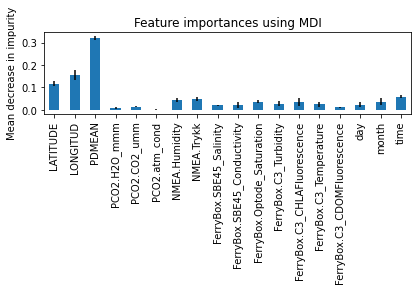

In [67]:
forest_importances = pd.Series(importances, index=X.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [68]:
forest_pred = forest.predict(X_val)

In [26]:
print('MAE score: ', mean_absolute_error(y_val, forest_pred))
print('R2 score: ', r2_score(y_val, forest_pred))
print('Smape score: ', smape(y_val, forest_pred.reshape(41194,1)))

MAE score:  16.67706884551148
R2 score:  0.7254252670067256
Smape score:  TOTAL    0.365734
dtype: float64


In [69]:
from sklearn.inspection import permutation_importance

start_time = time.time()
result = permutation_importance(
    forest, X_test, y_test, n_repeats=10, n_jobs=2
)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

forest_importances = pd.Series(result.importances_mean, index=X.columns)

Elapsed time to compute the importances: 383.309 seconds


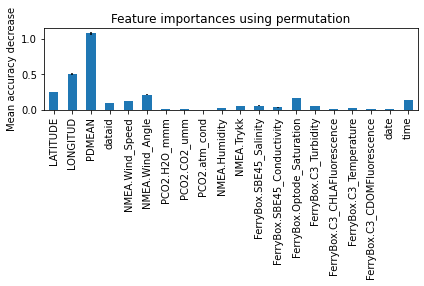

In [53]:
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

In [15]:
from sklearn.preprocessing import scale 
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_absolute_error, r2_score
import sklearn

Text(0.5, 1.0, 'Total')

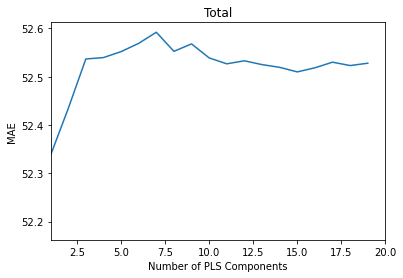

In [28]:
#define cross-validation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

mse = []
n = len(X_train)

# Calculate MAPE using cross-validation, adding one component at a time
for i in np.arange(1, 21):
    pls = PLSRegression(n_components=i)
    score = -1*model_selection.cross_val_score(pls, X_train, y_train, cv=cv,
               scoring='neg_mean_absolute_error').mean()
    mse.append(score)

#plot test MAPE vs. number of components
plt.plot(mse)
plt.xlabel('Number of PLS Components')
plt.ylabel('MAE')
plt.xlim((1,20))
plt.title('Total')

In [29]:
pls = PLSRegression(n_components=5)
pls.fit(X_train, y_train)

PLSRegression(n_components=5)

In [31]:
pls_pred = pls.predict(X_val)

In [35]:
print('MAE score: ', mean_absolute_error(y_val, pls_pred))
print('R2 score: ', r2_score(y_val, pls_pred))
print('Smape score: ', smape(y_val, pls_pred.reshape(41194,1)))

MAE score:  52.52527133049725
R2 score:  0.08136322266714835
Smape score:  TOTAL    1.221161
dtype: float64


In [16]:
def smape(A, F):
    return 1/len(A) * np.sum(2 * np.abs(F - A) / (np.abs(A) + np.abs(F)))

In [291]:
smape(y_test, pls_pred)

TOTAL    1.223121
dtype: float64